## JOHNATAN MEOÑO

## Regresion Polinomial & Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Users\Johnatan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
## data frame a matriz
datos = data.values

In [10]:
print("Tipo", type(datos))
print("Forma", datos.shape)
print("Rango", datos.ndim)
print("Vista de los datos", datos)

Tipo <class 'numpy.ndarray'>
Forma (1599, 12)
Rango 2
Vista de los datos [[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


## Analisis exploratorio 

## Y y su estadistica descriptiva 

In [16]:
y = datos[:,11]

print("Media de Y =", np.mean(y))
print("Valor Máximo de Y =", np.max(y))
print("Valor Mínimo de Y =", np.min(y))
print("Rango de Y =", np.max(y)-np.min(y)) 
print("Desviación Estandar de Y =", np.std(y))


Media de Y = 5.6360225140712945
Valor Máximo de Y = 8.0
Valor Mínimo de Y = 3.0
Rango de Y = 5.0
Desviación Estandar de Y = 0.8073168769639513


## X y su estadistica descriptiva 

In [17]:
x1 = datos[:,0] 
print("Media de x1 =", np.mean(x1))
print("Valor Máximo de x1 =", np.max(x1))
print("Valor Mínimo de x1 =", np.min(x1))
print("Rango de x1 =", np.max(x1)-np.min(x1)) 
print("Desviación Estandar de x1 =", np.std(x1))

Media de x1 = 8.31963727329581
Valor Máximo de x1 = 15.9
Valor Mínimo de x1 = 4.6
Rango de x1 = 11.3
Desviación Estandar de x1 = 1.7405518001102729


In [18]:
x2 = datos[:,1] 
print("Media de x2 =", np.mean(x2))
print("Valor Máximo de x2 =", np.max(x2))
print("Valor Mínimo de x2 =", np.min(x2))
print("Rango de x2 =", np.max(x2)-np.min(x2)) 
print("Desviación Estandar de x2 =", np.std(x2))

Media de x2 = 0.5278205128205128
Valor Máximo de x2 = 1.58
Valor Mínimo de x2 = 0.12
Rango de x2 = 1.46
Desviación Estandar de x2 = 0.17900370424469014


In [19]:
x3 = datos[:,2] 
print("Media de x3 =", np.mean(x3))
print("Valor Máximo de x3 =", np.max(x3))
print("Valor Mínimo de x3 =", np.min(x3))
print("Rango de x3 =", np.max(x3)-np.min(x3)) 
print("Desviación Estandar de x3 =", np.std(x3))

Media de x3 = 0.2709756097560976
Valor Máximo de x3 = 1.0
Valor Mínimo de x3 = 0.0
Rango de x3 = 1.0
Desviación Estandar de x3 = 0.19474021445233364


In [20]:
x4 = datos[:,3] 
print("Media de x4 =", np.mean(x4))
print("Valor Máximo de x4 =", np.max(x4))
print("Valor Mínimo de x4 =", np.min(x4))
print("Rango de x4 =", np.max(x4)-np.min(x4)) 
print("Desviación Estandar de x4 =", np.std(x4))

Media de x4 = 2.53880550343965
Valor Máximo de x4 = 15.5
Valor Mínimo de x4 = 0.9
Rango de x4 = 14.6
Desviación Estandar de x4 = 1.4094871124880495


In [21]:
x5 = datos[:,4] 
print("Media de x5 =", np.mean(x5))
print("Valor Máximo de x5 =", np.max(x5))
print("Valor Mínimo de x5 =", np.min(x5))
print("Rango de x5 =", np.max(x5)-np.min(x5)) 
print("Desviación Estandar de x5 =", np.std(x5))

Media de x5 = 0.08746654158849279
Valor Máximo de x5 = 0.611
Valor Mínimo de x5 = 0.012
Rango de x5 = 0.599
Desviación Estandar de x5 = 0.04705058260331571


In [22]:
x6 = datos[:,5] 
print("Media de x6 =", np.mean(x6))
print("Valor Máximo de x6 =", np.max(x6))
print("Valor Mínimo de x6 =", np.min(x6))
print("Rango de x6 =", np.max(x6)-np.min(x6)) 
print("Desviación Estandar de x6 =", np.std(x6))

Media de x6 = 15.874921826141339
Valor Máximo de x6 = 72.0
Valor Mínimo de x6 = 1.0
Rango de x6 = 71.0
Desviación Estandar de x6 = 10.45688561493072


In [23]:
x7 = datos[:,6] 
print("Media de x7 =", np.mean(x7))
print("Valor Máximo de x7 =", np.max(x7))
print("Valor Mínimo de x7 =", np.min(x7))
print("Rango de x7 =", np.max(x7)-np.min(x7)) 
print("Desviación Estandar de x7 =", np.std(x7))

Media de x7 = 46.46779237023139
Valor Máximo de x7 = 289.0
Valor Mínimo de x7 = 6.0
Rango de x7 = 283.0
Desviación Estandar de x7 = 32.88503665178374


In [24]:
x8 = datos[:,7] 
print("Media de x8 =", np.mean(x8))
print("Valor Máximo de x8 =", np.max(x8))
print("Valor Mínimo de x8 =", np.min(x8))
print("Rango de x8 =", np.max(x8)-np.min(x8)) 
print("Desviación Estandar de x8 =", np.std(x8))

Media de x8 = 0.9967466791744841
Valor Máximo de x8 = 1.00369
Valor Mínimo de x8 = 0.99007
Rango de x8 = 0.013619999999999965
Desviación Estandar de x8 = 0.0018867437008323914


In [25]:
x9 = datos[:,8] 
print("Media de x9 =", np.mean(x9))
print("Valor Máximo de x9 =", np.max(x9))
print("Valor Mínimo de x9 =", np.min(x9))
print("Rango de x9 =", np.max(x9)-np.min(x9)) 
print("Desviación Estandar de x9 =", np.std(x9))

Media de x9 = 3.3111131957473416
Valor Máximo de x9 = 4.01
Valor Mínimo de x9 = 2.74
Rango de x9 = 1.2699999999999996
Desviación Estandar de x9 = 0.15433818141060165


In [26]:
x10 = datos[:,9] 
print("Media de x10 =", np.mean(x10))
print("Valor Máximo de x10 =", np.max(x10))
print("Valor Mínimo de x10 =", np.min(x10))
print("Rango de x10 =", np.max(x10)-np.min(x10)) 
print("Desviación Estandar de x10 =", np.std(x10))

Media de x10 = 0.6581488430268917
Valor Máximo de x10 = 2.0
Valor Mínimo de x10 = 0.33
Rango de x10 = 1.67
Desviación Estandar de x10 = 0.16945396724179546


In [27]:
x11 = datos[:,10] 
print("Media de x11 =", np.mean(x11))
print("Valor Máximo de x11 =", np.max(x11))
print("Valor Mínimo de x11 =", np.min(x11))
print("Rango de x11 =", np.max(x11)-np.min(x11)) 
print("Desviación Estandar de x11 =", np.std(x11))

Media de x11 = 10.422983114446529
Valor Máximo de x11 = 14.9
Valor Mínimo de x11 = 8.4
Rango de x11 = 6.5
Desviación Estandar de x11 = 1.0653343003437483


## Histograma de cada variable

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


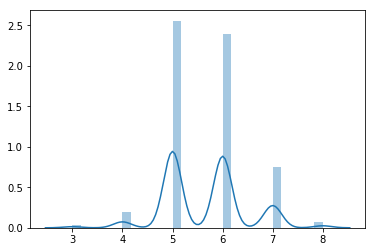

In [28]:
sb.distplot(y)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


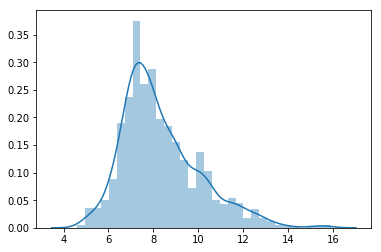

In [29]:
sb.distplot(x1)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


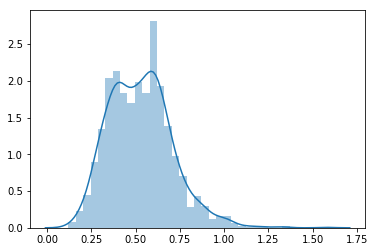

In [30]:
sb.distplot(x2)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


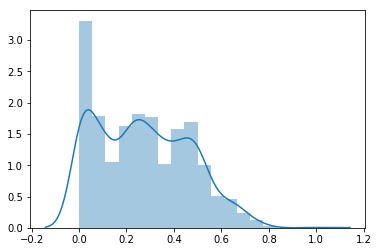

In [31]:
sb.distplot(x3)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


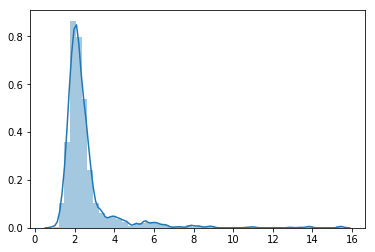

In [32]:
sb.distplot(x4)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


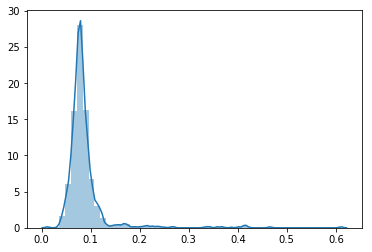

In [33]:
sb.distplot(x5)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


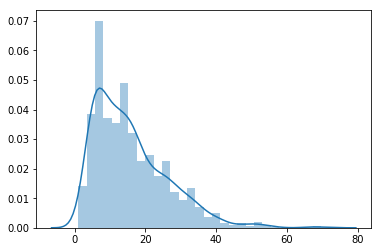

In [34]:
sb.distplot(x6)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


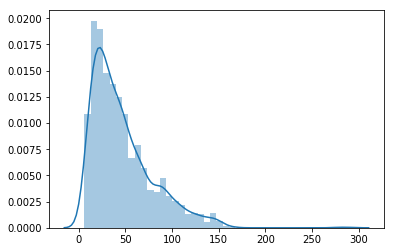

In [35]:
sb.distplot(x7)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


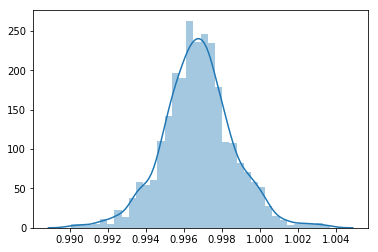

In [36]:
sb.distplot(x8)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


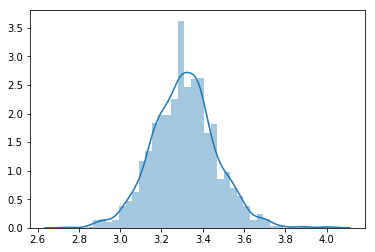

In [37]:
sb.distplot(x9)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


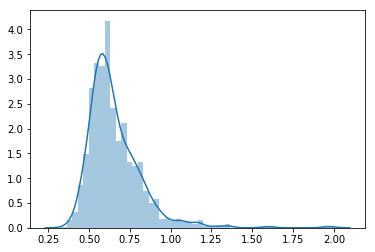

In [38]:
sb.distplot(x10)

C:\Users\Johnatan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


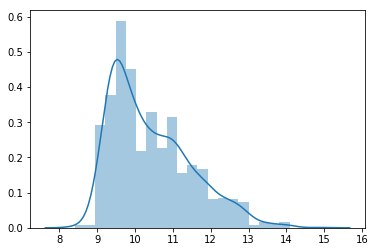

In [39]:
sb.distplot(x11)

## Gráfica Y versus X y su coeficiente de correlación

C:\Users\Johnatan\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


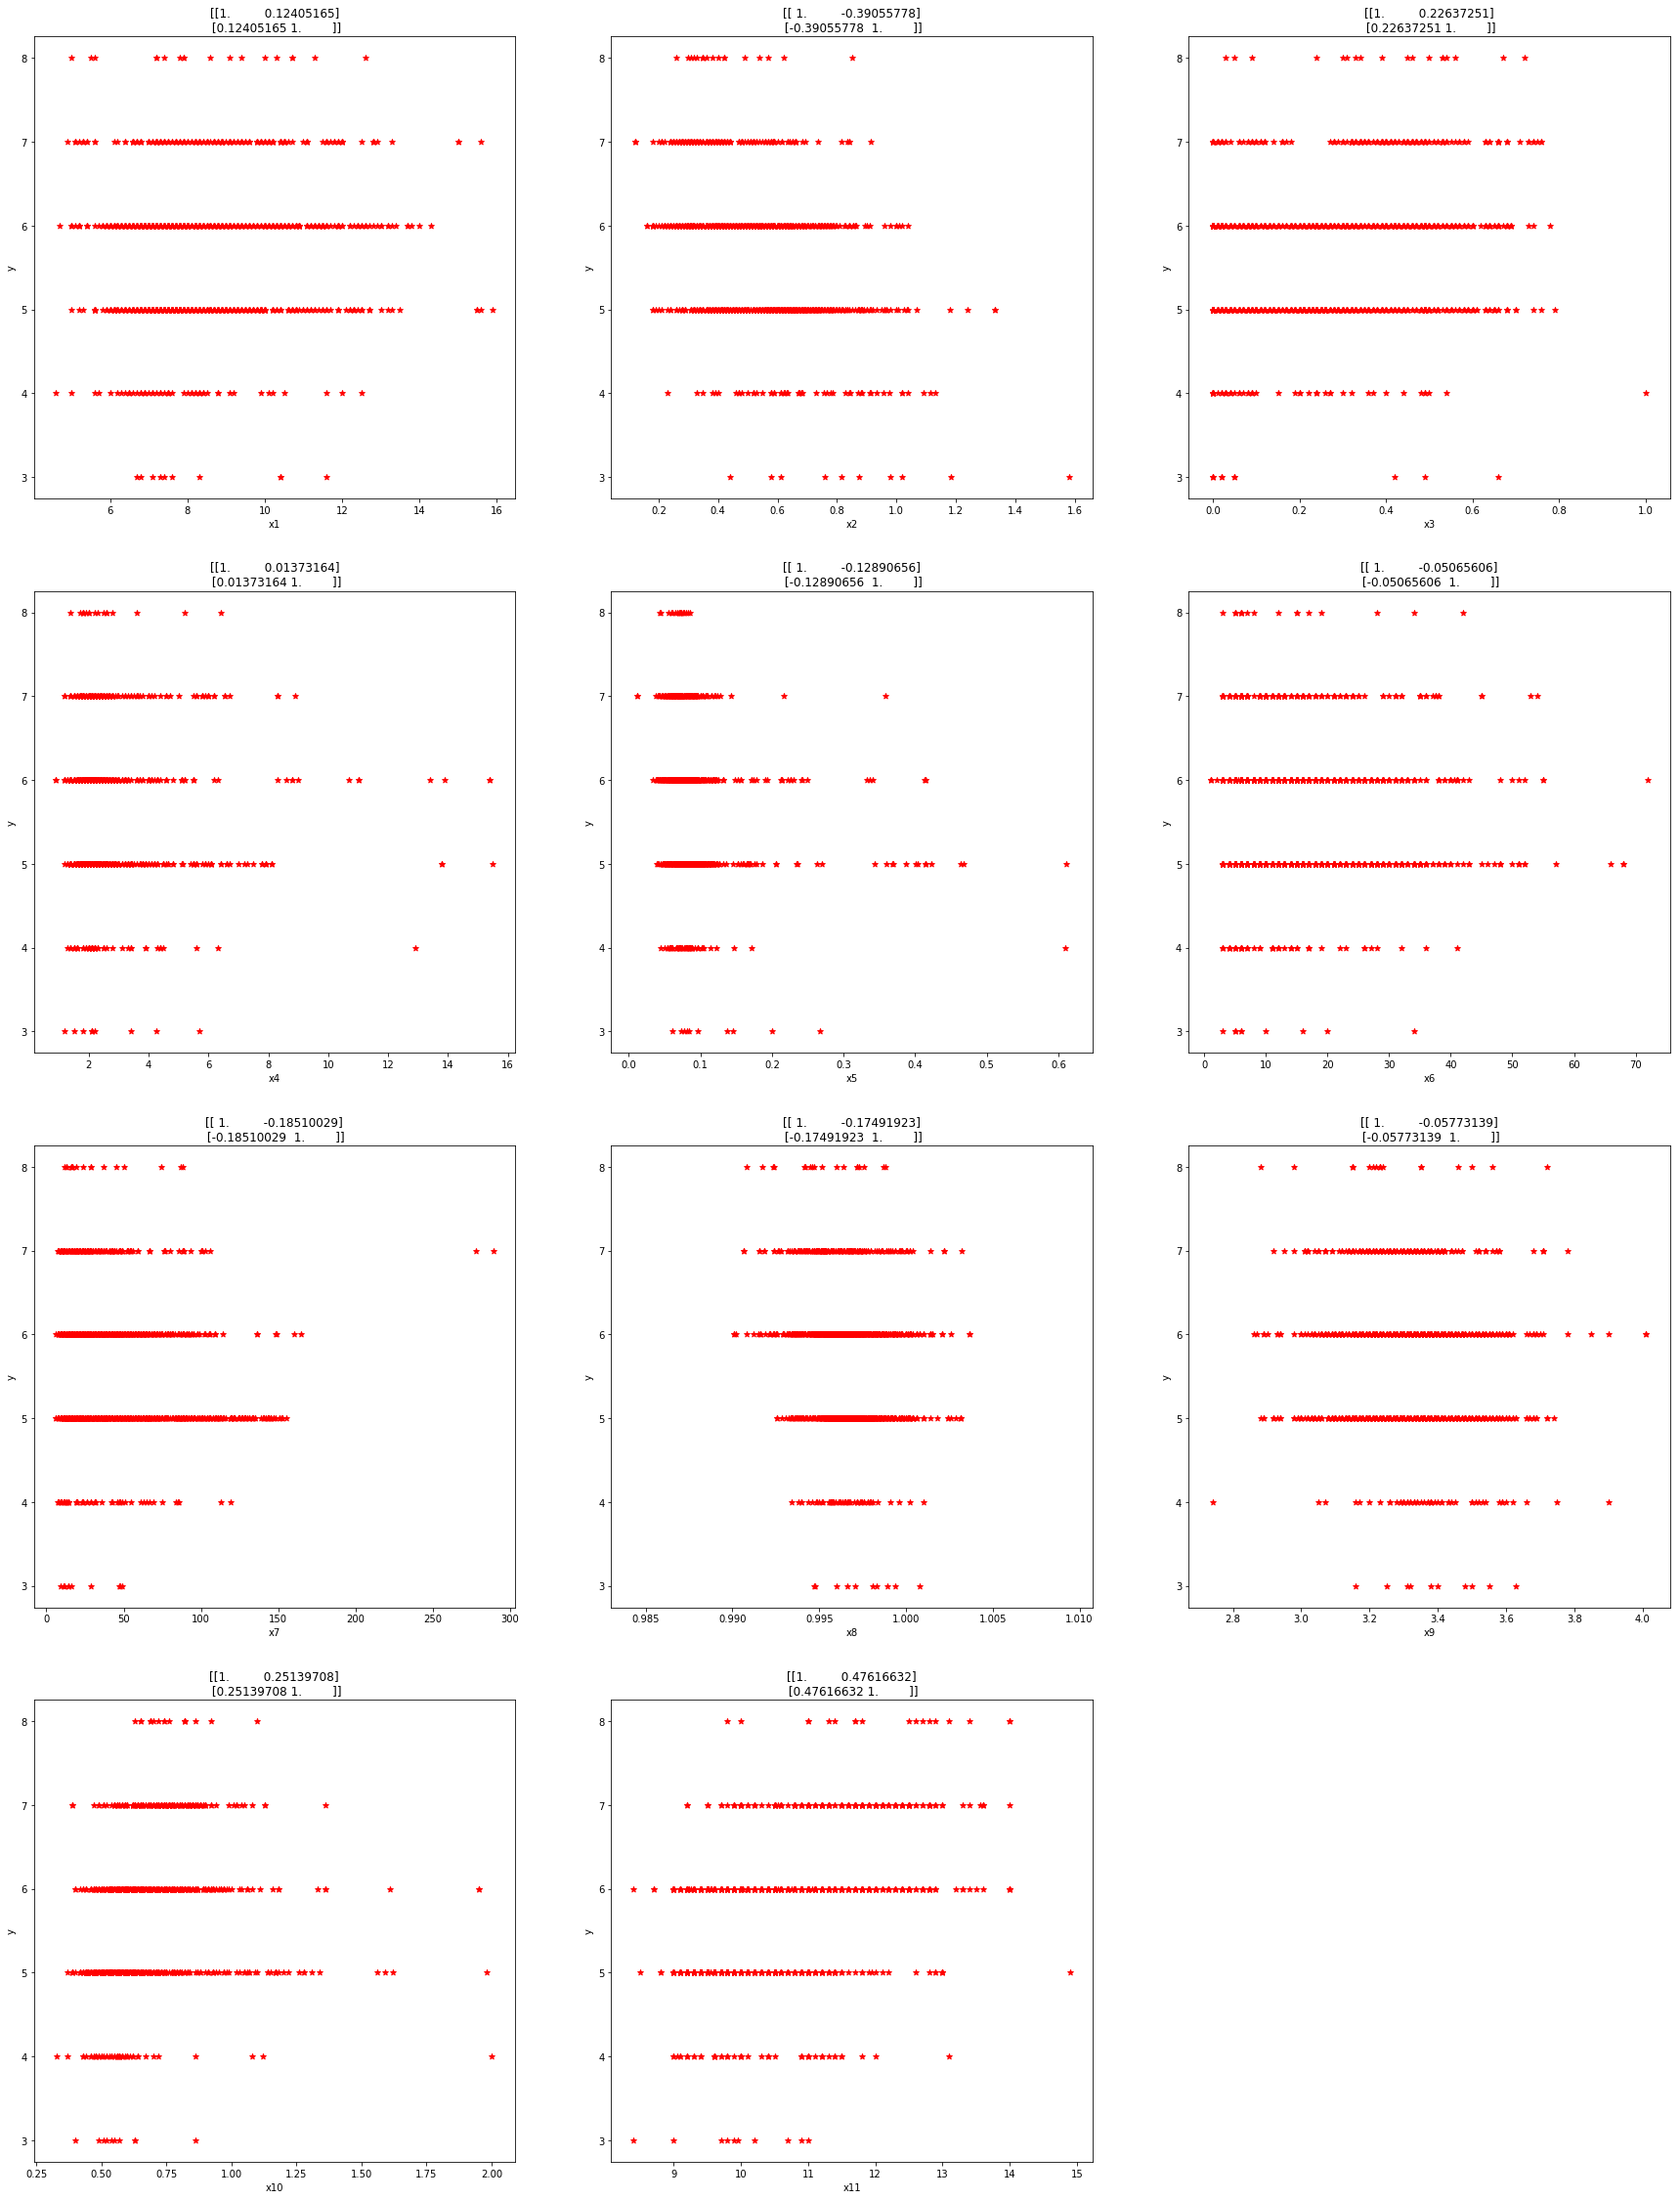

In [43]:
%matplotlib inline
fig  = plt.figure(figsize=(30,40))

ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)

ax1.scatter(x1,y,marker='*',color="r")
ax2.scatter(x2,y,marker='*',color="r")
ax3.scatter(x3,y,marker='*',color="r")
ax4.scatter(x4,y,marker='*',color="r")
ax5.scatter(x5,y,marker='*',color="r")
ax6.scatter(x6,y,marker='*',color="r")
ax7.scatter(x7,y,marker='*',color="r")
ax8.scatter(x8,y,marker='*',color="r")
ax9.scatter(x9,y,marker='*',color="r")
ax10.scatter(x10,y,marker='*',color="r")
ax11.scatter(x11,y,marker='*',color="r")


ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title(np.corrcoef(x1,y))

ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.set_title(np.corrcoef(x2,y))

ax3.set_xlabel('x3')
ax3.set_ylabel('y')
ax3.set_title(np.corrcoef(x3,y))

ax4.set_xlabel('x4')
ax4.set_ylabel('y')
ax4.set_title(np.corrcoef(x4,y))

ax5.set_xlabel('x5')
ax5.set_ylabel('y')
ax5.set_title(np.corrcoef(x5,y))

ax6.set_xlabel('x6')
ax6.set_ylabel('y')
ax6.set_title(np.corrcoef(x6,y))

ax7.set_xlabel('x7')
ax7.set_ylabel('y')
ax7.set_title(np.corrcoef(x7,y))

ax8.set_xlabel('x8')
ax8.set_ylabel('y')
ax8.set_title(np.corrcoef(x8,y))

ax9.set_xlabel('x9')
ax9.set_ylabel('y')
ax9.set_title(np.corrcoef(x9,y))

ax10.set_xlabel('x10')
ax10.set_ylabel('y')
ax10.set_title(np.corrcoef(x10,y))

ax11.set_xlabel('x11')
ax11.set_ylabel('y')
ax11.set_title(np.corrcoef(x11,y))


plt.show()

### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

## Nota: tengo problemas para correr tensorboard en mi laptop, el profesor trato de ayudarme pero no se pudo solucionar el problema

## Elección de las 2 variables con más potencial predictivo

## x2 con un coeficiente de correlación de -0.39055

In [45]:
print("Tipo", type(x2))
print("Forma", x2.shape)
print("Rango", x2.ndim)
print("Vista de los datos", x2)

Tipo <class 'numpy.ndarray'>
Forma (1599,)
Rango 1
Vista de los datos [0.7   0.88  0.76  ... 0.51  0.645 0.31 ]


## x11 con un coeficiente de correlación de 0.476

In [46]:
print("Tipo", type(x11))
print("Forma", x11.shape)
print("Rango", x11.ndim)
print("Vista de los datos", x11)

Tipo <class 'numpy.ndarray'>
Forma (1599,)
Rango 1
Vista de los datos [ 9.4  9.8  9.8 ... 11.  10.2 11. ]


In [48]:
y = np.reshape(y,(1599,1))
print("Tipo", type(y))
print("Forma", y.shape)
print("Rango", y.ndim)
print("Vista de los datos", y)

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [49]:
x2 = np.reshape(x2,(1599,1))
print("Tipo", type(x2))
print("Forma", x2.shape)
print("Rango", x2.ndim)
print("Vista de los datos", x2)

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[0.7  ]
 [0.88 ]
 [0.76 ]
 ...
 [0.51 ]
 [0.645]
 [0.31 ]]


In [50]:
x11 = np.reshape(x11,(1599,1))
print("Tipo", type(x11))
print("Forma", x11.shape)
print("Rango", x11.ndim)
print("Vista de los datos", x11)

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[ 9.4]
 [ 9.8]
 [ 9.8]
 ...
 [11. ]
 [10.2]
 [11. ]]


In [52]:
x2sqr = np.power(x2, 2) 
print("Tipo", type(x2sqr))
print("Forma", x2sqr.shape)
print("Rango", x2sqr.ndim)
print("Vista de los datos", x2sqr)

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[0.49    ]
 [0.7744  ]
 [0.5776  ]
 ...
 [0.2601  ]
 [0.416025]
 [0.0961  ]]


In [53]:
x11sqr = np.power(x11, 2) 
print("Tipo", type(x11sqr))
print("Forma", x11sqr.shape)
print("Rango", x11sqr.ndim)
print("Vista de los datos", x11sqr) 

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[ 88.36]
 [ 96.04]
 [ 96.04]
 ...
 [121.  ]
 [104.04]
 [121.  ]]


In [54]:
x2x11 = x2 * x11
print("Tipo", type(x2x11))
print("Forma", x2x11.shape)
print("Rango", x2x11.ndim)
print("Vista de los datos", x2x11) 

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[6.58 ]
 [8.624]
 [7.448]
 ...
 [5.61 ]
 [6.579]
 [3.41 ]]


## Vector de unos 

In [56]:
unos = np.ones_like(y)
print("Tipo", type(unos))
print("Forma", unos.shape)
print("Rango", unos.ndim)
print("Vista de los datos", unos) 

Tipo <class 'numpy.ndarray'>
Forma (1599, 1)
Rango 2
Vista de los datos [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


## Nueva matriz

In [57]:
new = np.hstack((unos,x2,x11,x2x11,x2sqr,x11sqr))
print("Tipo", type(new))
print("Forma", new.shape)
print("Rango", new.ndim)
print("Vista de los datos", new) 

Tipo <class 'numpy.ndarray'>
Forma (1599, 6)
Rango 2
Vista de los datos [[1.00000e+00 7.00000e-01 9.40000e+00 6.58000e+00 4.90000e-01 8.83600e+01]
 [1.00000e+00 8.80000e-01 9.80000e+00 8.62400e+00 7.74400e-01 9.60400e+01]
 [1.00000e+00 7.60000e-01 9.80000e+00 7.44800e+00 5.77600e-01 9.60400e+01]
 ...
 [1.00000e+00 5.10000e-01 1.10000e+01 5.61000e+00 2.60100e-01 1.21000e+02]
 [1.00000e+00 6.45000e-01 1.02000e+01 6.57900e+00 4.16025e-01 1.04040e+02]
 [1.00000e+00 3.10000e-01 1.10000e+01 3.41000e+00 9.61000e-02 1.21000e+02]]


## Vector de parametos entrenables

In [59]:
estimadores =  np.array([[0.0],
                         [0.0],
                         [0.0],
                         [0.0],
                         [0.0],
                         [0.0]])

print("Tipo", type(estimadores ))
print("Forma", estimadores.shape)
print("Rango", estimadores.ndim)
print("Vista de los datos", estimadores)


Tipo <class 'numpy.ndarray'>
Forma (6, 1)
Rango 2
Vista de los datos [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Grafo

In [60]:

grafo1 = tf.Graph()
with grafo1.as_default():
    # cargando datos como constantes 
    yentreno_g = tf.constant(y)
    xentreno_g = tf.constant(new)
      
    #placeholder = 
    ph_lr_g = tf.placeholder(dtype = tf.float64)    
  
    # definiendo los parametros o estimadores beta 1 y beta 2 como
    # variables
    #estimadores = tf.Variable(np.array([[0],
                                        #[0]]))
        
    estimadores_g = tf.Variable(estimadores, name = "Betas", dtype = tf.float64)
    
    # entrenamiento
    #yhat = tf.matmul(xentreno, estimadores)
    # hipotesis 
    yhat_g = tf.matmul(xentreno_g, estimadores_g)
    
    # costo
    error_g = (tf.reduce_mean(tf.pow(yentreno_g-yhat_g,2)))*0.5
    
    ##para tensorboard
    first_summary = tf.summary.scalar(name='My_first_scalar_summary', tensor=error_g)
    
    # gradient descent un nodo mas del grafo
    optimizacion_g = tf.train.GradientDescentOptimizer(ph_lr_g).minimize(error_g)

## Sesion

In [86]:
def entrenamiento(epochs,lr,imprimir_cada):
    with tf.Session(graph = grafo1) as session:
        # incializando variables
        tf.global_variables_initializer().run()
        print('Initialized')
        writer = tf.summary.FileWriter('./graphs', session.graph)
        for step in range(epochs): 
            # sesion que ejecuta los nodos y envia informacion con feed_dict al nodo del learning rate
            erro, optimi = session.run([error_g, optimizacion_g],feed_dict={ph_lr_g:lr})
            summary = session.run(first_summary)
            writer.add_summary(summary, step)
            if (step % imprimir_cada == 0):
                print("Iteracion:", step, "Error:", erro, "Betas:", session.run(estimadores_g)) ## 

## Entrenamieto con learning_rate igual a 0.0001

In [87]:
entrenamiento(10,0.0001,1)

Initialized
Iteracion: 0 Error: 16.20825515947467 Betas: [[0.0005636 ]
 [0.00029184]
 [0.00591537]
 [0.00303975]
 [0.00016862]
 [0.06275597]]
Iteracion: 1 Error: 1.7267961451937053 Betas: [[0.00043041]
 [0.00022109]
 [0.00441231]
 [0.00225021]
 [0.00012582]
 [0.04562152]]
Iteracion: 2 Error: 0.6487298755236773 Betas: [[0.00048732]
 [0.00024926]
 [0.00493324]
 [0.0025054 ]
 [0.00014069]
 [0.05028397]]
Iteracion: 3 Error: 0.5683968392567205 Betas: [[0.00049236]
 [0.00025044]
 [0.00490194]
 [0.00247553]
 [0.00013983]
 [0.04899947]]
Iteracion: 4 Error: 0.5623339605804445 Betas: [[0.00051155]
 [0.00025898]
 [0.00502129]
 [0.0025234 ]
 [0.00014325]
 [0.0493375 ]]
Iteracion: 5 Error: 0.5617997064900128 Betas: [[0.00052687]
 [0.00026551]
 [0.00509952]
 [0.00255002]
 [0.00014551]
 [0.04923286]]
Iteracion: 6 Error: 0.5616770360235568 Betas: [[0.00054325]
 [0.00027259]
 [0.00518894]
 [0.00258241]
 [0.00014808]
 [0.04924899]]
Iteracion: 7 Error: 0.561585042486342 Betas: [[0.00055934]
 [0.00027951]

## Entrenamieto con learning_rate igual a 0.001

In [81]:
entrenamiento(10,0.001,1)

Initialized
Iteracion: 0 Error: 16.20825515947467
Iteracion: 1 Error: 2152.7395461500046
Iteracion: 2 Error: 296041.6245825387
Iteracion: 3 Error: 40721679.84381266
Iteracion: 4 Error: 5601436302.778608
Iteracion: 5 Error: 770500853582.5288
Iteracion: 6 Error: 105985596075646.78
Iteracion: 7 Error: 1.4578759417707786e+16
Iteracion: 8 Error: 2.0053689749284836e+18
Iteracion: 9 Error: 2.7584684062493583e+20


## Entrenamieto con learning_rate igual a 0.01

In [82]:
entrenamiento(10,0.01,1)

Initialized
Iteracion: 0 Error: 16.20825515947467
Iteracion: 1 Error: 249516.10927839874
Iteracion: 2 Error: 3979153948.6923733
Iteracion: 3 Error: 63457631262519.91
Iteracion: 4 Error: 1.0119917494834774e+18
Iteracion: 5 Error: 1.6138757162017158e+22
Iteracion: 6 Error: 2.5737312865198683e+26
Iteracion: 7 Error: 4.1044627344670233e+30
Iteracion: 8 Error: 6.545599545245473e+34
Iteracion: 9 Error: 1.043860699402386e+39


## Entrenamieto con learning_rate igual a 0.1

In [83]:
entrenamiento(10,0.1,1)

Initialized
Iteracion: 0 Error: 16.20825515947467
Iteracion: 1 Error: 25308474.029820945
Iteracion: 2 Error: 40938072635873.54
Iteracion: 3 Error: 6.621994756188958e+19
Iteracion: 4 Error: 1.0711499522957162e+26
Iteracion: 5 Error: 1.732653471570307e+32
Iteracion: 6 Error: 2.8026776700222807e+38
Iteracion: 7 Error: 4.53351016283858e+44
Iteracion: 8 Error: 7.333242283404376e+50
Iteracion: 9 Error: 1.1861987831839035e+57


## Entrenamieto con learning_rate igual a 1

In [84]:
entrenamiento(10,1,1)

Initialized
Iteracion: 0 Error: 16.20825515947467
Iteracion: 1 Error: 2534430475.557251
Iteracion: 2 Error: 4.1054073208008794e+17
Iteracion: 3 Error: 6.650160435276306e+25
Iteracion: 4 Error: 1.077228892510648e+34
Iteracion: 5 Error: 1.7449535212777195e+42
Iteracion: 6 Error: 2.826569926399759e+50
Iteracion: 7 Error: 4.578630577493735e+58
Iteracion: 8 Error: 7.41671301649437e+66
Iteracion: 9 Error: 1.201399218347668e+75


## Entrenamieto con learning_rate igual a 10

In [85]:
entrenamiento(10,10,1)

Initialized
Iteracion: 0 Error: 16.20825515947467
Iteracion: 1 Error: 253478892723.0321
Iteracion: 2 Error: 4.106568680854011e+21
Iteracion: 3 Error: 6.652982485408457e+31
Iteracion: 4 Error: 1.0778384435042922e+42
Iteracion: 5 Error: 1.7461878380767007e+52
Iteracion: 6 Error: 2.828969391677523e+62
Iteracion: 7 Error: 4.583165478842814e+72
Iteracion: 8 Error: 7.425108899464157e+82
Iteracion: 9 Error: 1.2029293383232125e+93


## Conclusiones y Recomendaciones
Luego de aplicar un enfoque de investigacion podemos observar como la hipotesis del modelo uno presenta un comportamiento esperado del error en el tiempo, el cual decrece de forma suavizada tendiendo a cero.

Por lo que se recomienda utilizar el modelo 1 con un LR de 0.0001

El cual dio como resultado lo siguiente: 

### Parametros entrenables:
[[0.00059164]
 [0.00029342]
 [0.0054494 ]
 [0.00267545]
 [0.00015555]
 [0.04921409]]

### Hipotesis: Y = B0 + B1*X1 + B2*X2 + B3*X1*X2 + B4*X1^2 + B5*X2^2

### Y = 0.00059164 + 0.00029342*X1 + 0.0054494*X2 + 0.00267545*X1*X2 + 0.00015555*X1^2 + 0.04921409*X2^2